In [26]:
library(tidyverse)
library(nycflights13)

# Lecture 17: Vectors, lists, iteration & FP
In this lecture we'll learn about:
- [Atomic vectors](#Atomic-vectors), or what we have been calling vectors up to this point.
- [Lists](#Lists), a.k.a. recursive vectors.
- [Iteration](#Iteration): `for`/`while` loops.
- [Functional programming](#Functional-programming) (FP): functions that operate on other functions.

## Atomic vectors
Vectors are sequences of data elements in R. So far we have exclusively studied *atomic* vectors, which are sequences of elements that all have the same type. The two most important properties of a vector are its *type* and its *length*:

In [29]:
(x = 1:3)  # atomic vector of integers
typeof(x)
length(x)

[1] 1 2 3

[1] "integer"

[1] 3

In [28]:
(x = c('a', 'b', 'c'))  # atomic vector of characters
typeof(x)
length(x)

[1] "a" "b" "c"

[1] "character"

[1] 3

A single data element is called a *scalar.* An important thing to realize is that, to R, there is no distinction between scalars and vectors -- a scalar is simply an atomic vector of length one.

In [4]:
1     # scalar
c(1)  # vector

[1] 1

[1] 1

### Types of atomic vectors
The most important types of atomic vector are logical, numeric, and character.

Logical vectors hold the values `TRUE`, `FALSE` and `NA`.

In [5]:
(x = c(TRUE, TRUE, FALSE, NA))
typeof(x)
typeof(NA)

[1]  TRUE  TRUE FALSE    NA

[1] "logical"

[1] "logical"

Numeric vectors hold integers or doubles. By default, if you enter a number in R it is stored as a double:

In [30]:
typeof(1.12)

[1] "double"

If you want to explicitly store integers, attach a capital `L` to the number:

In [31]:
typeof(as.integer(1))

[1] "integer"

### Names

It is possible to assign names to each entry of a vector:

In [45]:
(v = c(a=1, b=2, c=3))
# c(a=1, b=2, stats306=3) == c(1, 2, 3)
names(v)
names(v) <- c("stats", 'ds', 'cs')

v["stats"]
v[1]

a b c 
1 2 3 

[1] "a" "b" "c"

stats 
    1 

stats 
    1 

## Lists
Lists are another type of sequence data type found in R. Unlike atomic vectors, lists can hold objects of multiple types:

In [44]:
# list(1, 2, 3, "a") %>% str
x = list('a', 1L, FALSE, pi, list(1:3))
x

[[1]]
[1] "a"

[[2]]
[1] 1

[[3]]
[1] FALSE

[[4]]
[1] 3.141593

[[5]]
[[5]][[1]]
[1] 1 2 3



As the printout suggests, you can think of a list as a "vector of vectors". For this reason, they are sometimes referred to as "recursive vectors".

The `str` command will print out the **str**ucture of a vector:

In [12]:
str(x) 

List of 5
 $ : chr "a"
 $ : int 1
 $ : logi FALSE
 $ : num 3.14
 $ :List of 1
  ..$ : int [1:3] 1 2 3


Just like atomic vectors, you can name each individual entry of a list:

In [13]:
x_named <- list(a = 1, b = 2, c = 3)
str(x_named)
names(x_named)

List of 3
 $ a: num 1
 $ b: num 2
 $ c: num 3


[1] "a" "b" "c"

### Sub-setting lists
Subsetting lists is a little more complex than subsetting atomic vectors. We will use the following example list:

In [47]:
str(example_list <- list(a = 1:3, b = "a string", c = pi, d = list(-1, -5)))

List of 4
 $ a: int [1:3] 1 2 3
 $ b: chr "a string"
 $ c: num 3.14
 $ d:List of 2
  ..$ : num -1
  ..$ : num -5


#### `[]`
The `[]` operator extracts a sub-list. That is, the return type will always be a list:

In [52]:
# example_v <- 1:3
# str(example_list)
# example_v[1]
# str(example_list[1])
str(example_list[[1]])

 int [1:3] 1 2 3


As with atomic vectors, the single brackets accept integer, logical and character vectors:

In [66]:
str(example_list)
# example_list[c(1,2,4)]
# str(example_list[c('a', 'd')])
# str(example_list[c(TRUE, TRUE, FALSE, TRUE)])  # what happened here?
str(example_list[-3])

List of 4
 $ a: int [1:3] 1 2 3
 $ b: chr "a string"
 $ c: num 3.14
 $ d:List of 2
  ..$ : num -1
  ..$ : num -5
List of 3
 $ a: int [1:3] 1 2 3
 $ b: chr "a string"
 $ d:List of 2
  ..$ : num -1
  ..$ : num -5


#### `[[]]`
The double-brackets will extract a single component from the list:

In [61]:
str(example_list)
example_list[["d"]]

List of 4
 $ a: int [1:3] 1 2 3
 $ b: chr "a string"
 $ c: num 3.14
 $ d:List of 2
  ..$ : num -1
  ..$ : num -5


[[1]]
[1] -1

[[2]]
[1] -5


You can also pass an integer vector to `[[]]`. This will index into successive levels of the list:

In [69]:
str(example_list)
example_list[[c(4,2)]]

List of 4
 $ a: int [1:3] 1 2 3
 $ b: chr "a string"
 $ c: num 3.14
 $ d:List of 2
  ..$ : num -1
  ..$ : num -5


[1] -5

### Data frames are lists
Many data types in R are actually lists plus some additional attributes. For example, tibbles and data frames are both lists:

In [83]:
# typeof(mpg)
# mpg$model
example_list$b

[1] "a string"

The `names()` of a tibble/data frame correspond to columns. This means we can use the list indexing methods shown above to access columns:

In [84]:
names(mpg)

 [1] "manufacturer" "model"        "displ"        "year"         "cyl"         
 [6] "trans"        "drv"          "cty"          "hwy"          "fl"          
[11] "class"       

Note that the *class* of a tibble is different from the *type*:

In [98]:
# typeof(mpg)
# str(mpg)
class(mpg) <- c("data.frame")
mpg %>% print

   manufacturer               model displ year cyl      trans drv cty hwy fl
1          audi                  a4   1.8 1999   4   auto(l5)   f  18  29  p
2          audi                  a4   1.8 1999   4 manual(m5)   f  21  29  p
3          audi                  a4   2.0 2008   4 manual(m6)   f  20  31  p
4          audi                  a4   2.0 2008   4   auto(av)   f  21  30  p
5          audi                  a4   2.8 1999   6   auto(l5)   f  16  26  p
6          audi                  a4   2.8 1999   6 manual(m5)   f  18  26  p
7          audi                  a4   3.1 2008   6   auto(av)   f  18  27  p
8          audi          a4 quattro   1.8 1999   4 manual(m5)   4  18  26  p
9          audi          a4 quattro   1.8 1999   4   auto(l5)   4  16  25  p
10         audi          a4 quattro   2.0 2008   4 manual(m6)   4  20  28  p
11         audi          a4 quattro   2.0 2008   4   auto(s6)   4  19  27  p
12         audi          a4 quattro   2.8 1999   6   auto(l5)   4  15  25  p

### Classes vs. types
Classes and types are not the same. Class is an attribute that R checks in order to know how to call certain functions (e.g. `print`) when presented with an object. Changing the class will change the way that R handles the object:

In [9]:
df <- tibble()
df %>% print
attributes(tibble)

# A tibble: 0 x 0


NULL

In [23]:
# attr(df, "class") = NULL
# attributes(df)
print(df)

function (x, df1, df2, ncp, log = FALSE) 
{
    if (missing(ncp)) 
        .Call(C_df, x, df1, df2, log)
    else .Call(C_dnf, x, df1, df2, ncp, log)
}
<bytecode: 0x7fdd72b64d78>
<environment: namespace:stats>


## Iteration
Iteration means, roughly, "running the same piece of code repeatedly". There are many ways to perform iteration in R. The one you have probably heard of is the *for loop*:
```{r}
for (<index> in <vector>) {
    [do something for each value of <index>]
}
```

For example, suppose we wanted to compute the median for each column of the following tibble:

In [111]:
set.seed(1)
df = tibble(
  a = rnorm(10),
  b = rnorm(10),
  c = rnorm(10),
  d = rnorm(10)
)
df

   a          b           c           d          
1  -0.6264538  1.51178117  0.91897737  1.35867955
2   0.1836433  0.38984324  0.78213630 -0.10278773
3  -0.8356286 -0.62124058  0.07456498  0.38767161
4   1.5952808 -2.21469989 -1.98935170 -0.05380504
5   0.3295078  1.12493092  0.61982575 -1.37705956
6  -0.8204684 -0.04493361 -0.05612874 -0.41499456
7   0.4874291 -0.01619026 -0.15579551 -0.39428995
8   0.7383247  0.94383621 -1.47075238 -0.05931340
9   0.5757814  0.82122120 -0.47815006  1.10002537
10 -0.3053884  0.59390132  0.41794156  0.76317575

One option is to repeatedly write out the call `median` for each column:

In [113]:
mean(df$a)
mean(df$b)
mean(df$c)
mean(df$d)

[1] 0.1322028

[1] 0.248845

[1] -0.1336732

[1] 0.1207302

But this involves too much repetition, and we argued last lecture that repetition is generally a bad idea when coding. Instead, we can use a for loop to "loop over" each column of `df` and grab the median:

In [120]:


for (column in df) {
    means <- c(mean(column), means)
    print(length(means))
}
means

[1] 1
[1] 2
[1] 3
[1] 4


[1]  0.1207302 -0.1336732  0.2488450  0.1322028

Again, this works because data frames are *lists*, and each element of the list is one column:

In [22]:
str(df)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	10 obs. of  4 variables:
 $ a: num  -0.626 0.184 -0.836 1.595 0.33 ...
 $ b: num  1.512 0.39 -0.621 -2.215 1.125 ...
 $ c: num  0.919 0.7821 0.0746 -1.9894 0.6198 ...
 $ d: num  1.3587 -0.1028 0.3877 -0.0538 -1.3771 ...


The for loop should have three components:
1. The *output*, in this case a vector with one entry per column of `df`.
2. The *sequence* of values along which we will iterate. Here we are using `seq_along(df)`, which generates a sequence of numbers from one up to `ncol(df)`. (This relies on the fact that a `data.frame` is really a list with one entry per column of data.)
3. The *body*, which is the piece of code that gets executed in each iteration of the loop. In the example above, the body first runs `output[[1]] = median(df[[1]])`, then `output[[2]] = median(df[[2]])`, etc., on up to `i=4`.

### Unknown output length
In each of the examples above we "pre-allocated" the `output` vector before running the `for` loop. Sometimes you may not know in advance how much output will be generated. For example, the following code draws three random numbers between 0 and 100, and for each number appends that many randomly normal entries to `output`:

In [21]:
output = double()
str(output)

for (column in df) {
  output = c(output, median(column))
}

output

 num(0) 


[1]  0.256575548  0.491872279  0.009218122 -0.056559219

This code works perfectly well, but it turns out to be inefficient. The reason is that each time we append to `output` via the command `output = c(output, rnorm(n, means[[i]]))`, R ends up having to copy all of the data from the previous iterations. 

A more efficient option is to store the results of each iteration in a list, and then concatenate all the entries of the list together after the for loop terminates:

In [144]:
# out = vector("double", length(df))
# str(out)

# for (i in seq_along(df)) {
#     sub_df <- df[[i]]
#     out[i] <- mean(col)
# }

print("single brackets")
mean(df[1]) %>% str
print("double brackets")
df[[1]] %>% mean

[1] "single brackets"


Warning message in mean.default(df[1]):
“argument is not numeric or logical: returning NA”

 num NA
[1] "double brackets"


[1] 0.1322028

To convince you that this is actually more efficient, we will run a *benchmark* of the two methods. I will wrap the two approaches in functions called `f1` and `f2`, and then use the `microbenchmark` library to test which one runs faster.

In [11]:
f1 = function(n) { 
    means = 1:n
    output = double()
    for (i in seq_along(means)) {
        n = sample(100, 1)
        output = c(output, rnorm(n, means[[i]]))
    }
    output 
}

f2 = function(n) { 
    means = 1:n
    out = vector("list", length(means))
    for (i in seq_along(means)) {
        n = sample(100, 1)
        out[[i]] <- rnorm(n, means[[i]])
    }
    unlist(out)
}

In [12]:
library(microbenchmark)
microbenchmark(
    f1(1000),
    f2(1000)
) %>% print

Unit: milliseconds
     expr       min        lq      mean   median        uq       max neval
 f1(1000) 196.78856 211.26196 216.87437 215.2127 220.47047 280.67699   100
 f2(1000)  12.19852  12.92915  15.01602  13.9145  15.69689  28.88104   100


## Down with `for` loops
We don't use for loops that often in R because of vectorization. For example, 
```{r}
# sum the numbers 1 to 100
output <- 0
v <- 1:100
for (i in v) {
    output <- output + i
}
```
is exactly equivalent to
```{r}
output = sum(1:100)
```
The latter is both faster and more concise.

### Exercise
Eliminate the for loops in each of the following commands by using functions that work with vectors.

#### Function 1
```{r}
# Function 1
out <- ""
for (x in letters) {
  out <- stringr::str_c(out, x)
}
```

In [155]:
# Solution
letters = c("h", "e", "l", "l", "o", " ", "w", "o", "r", "l", "d")

str_c(letters, collapse="")

[1] "hello world"

#### Function 2
```{r}
x <- sample(100)
sd <- 0
for (i in seq_along(x)) {
  sd <- sd + (x[i] - mean(x)) ^ 2
}
sd <- sqrt(sd / (length(x) - 1))
```

In [158]:
# Solution
x <- sample(100)
sd <- 0
for (i in seq_along(x)) {
  sd <- sd + (x[i] - mean(x)) ^ 2
}
sd <- sqrt(sd / (length(x) - 1))


sd(x)

[1] 29.01149

[1] 29.01149

#### Function 3
```{r}
x <- runif(100)
out <- vector("numeric", length(x))
out[1] <- x[1]
for (i in 2:length(x)) {
  out[i] <- out[i - 1] + x[i]
}
```

In [161]:
# Solution
x <- 1:5
out <- vector("numeric", length(x))
out[1] <- x[1]
for (i in 2:length(x)) {
  out[i] <- out[i - 1] + x[i]
}
out

cumprod(x)

[1]  1  3  6 10 15

[1]   1   2   6  24 120

### While loops
In some cases you don't even know how long is the sequence over which you are iterating. Here it is not possible to use a `for` loop; instead you must use a `while` loop:
```{r}
while (<condition>) {
    <body>
}
```
The `while` loop will continue running until `<condition>` returns `FALSE`.

Here's an example of how we would use a `while` loop. The following command counts the number of heads and tails encountered in tosses of a fair coin until the third head is encountered:

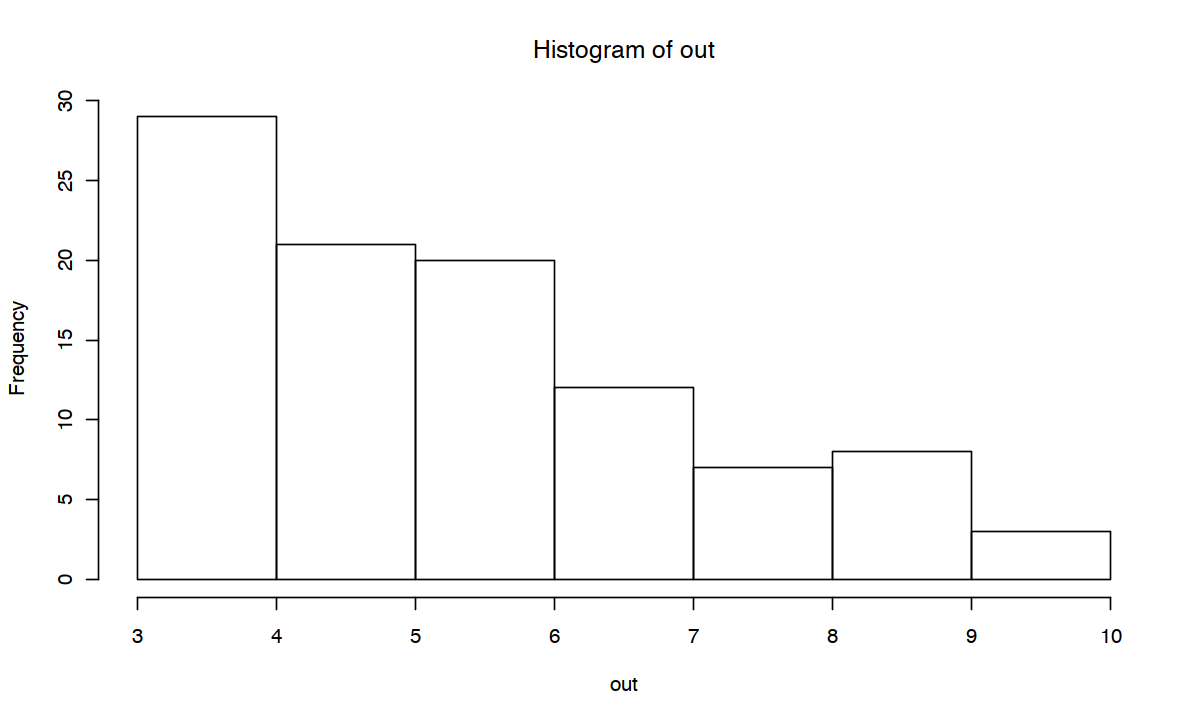

In [203]:
hist(out)

(Bonus question: what is the distribution of `n_head + n_tail`?)

`while` loops are used mainly in random simulations. They don't come up a lot in data analysis. Still, it's useful to know about them.

## Functional programming
R is a *functional programming language*, which means, loosely, that functions are treated just like any other data. In particular, they can be passed to other functions. As we will see, this means that most `for` loop type iterations can be replaced by cleaner, functional constructs.

### Example
In the following series of examples, we'll see how the need to write extensible code naturally leads to ideas from functional programming (FP). Above we've seen several examples of functions that apply the `mean` or `median` function to each column of a tibble:

In [206]:
df = tibble(
  a = rnorm(10),
  b = rnorm(10),
  c = rnorm(10),
  d = rnorm(10)
)
median(df$a)
median(df$b)
median(df$c)
median(df$d)

[1] -0.3747043

[1] 0.2830677

[1] -0.04397325

[1] -0.1418017

As we have already used this code (or a close variant) on several occasions, it makes sense to extract it out to a function:

In [210]:
col_median = function(df) {
  output = vector("double", length(df))
  for (i in seq_along(df)) {
    output[i] = median(df[[i]])
  }
  output
}

col_mean = function(df) {
  output = vector("double", length(df))
  for (i in seq_along(df)) {
    output[i] = mean(df[[i]])
  }
  output
}

col_median(df)
col_mean(df)

[1] -0.37470426  0.28306771 -0.04397325 -0.14180175

[1] -0.2433733  0.3428673 -0.0637145 -0.1306789

The function `col_mean` could just as easily be used to compute the `median` or `rescale01` of each column. Indeed, we would only need to change a single function call in the body of the for loop:
```{r}
output[i] = mean(df[[i]])
```
So it makes sense to generalize `col_mean` to a new function that takes as parameters a data frame `df` as well as a function `f` to apply to each column:

In [216]:
df %>% col_summary(median)

[1] -0.37470426  0.28306771 -0.04397325 -0.14180175

In [217]:
df %>% col_summary(median)
df %>% col_summary(mean)

[1] -0.37470426  0.28306771 -0.04397325 -0.14180175

[1] -0.2433733  0.3428673 -0.0637145 -0.1306789

Notice how much more elegant and readable `df %>% col_summary(median)` is compared to
```{r}
output <- vector("double", length(df))
for (i in seq_along(df)) {
  output[[i]] <- median(df[[i]])
}
output
```
If you understand why the former is preferable, you understand the Zen of Functional Programming!

## `map` functions
The pattern of looping over a sequence, doing something to each element and saving the results turns out to be extremely common in data analysis. It even has a name: "map".

### Example
How would we write `col_summary` using one of the `map` functions?

In [221]:
map(df, max)

$a
[1] 1.419102

$b
[1] 1.634342

$c
[1] 1.129936

$d
[1] 0.9802234


There is a set of functions in `tidyverse` designed to help you map over data as easily as possible:
- `map()` makes a list.
- `map_lgl()` makes a logical vector.
- `map_int()` makes an integer vector.
- `map_dbl()` makes a double vector.
- `map_chr()` makes a character vector.

In most cases we will be able to replace `for` loops with calls to these functions, leading to simpler and more readable code.

Compared to `col_summary`, the `map_` functions have a few advantages. One, we can forward additional arguments to the called function:

In [234]:
map_int(df_na, mean, na.rm = T) 

ERROR: Error: Can't coerce element 1 from a double to a integer


Two, names are preserved:

In [239]:
x = list(a=1, b=2, c=c(2, 3))
f <- function(x) mean(x + 1)
map_dbl(x, f)

  a   b   c 
2.0 3.0 3.5 

Three, the `map_` functions allow for some handy shortcuts in addition to taking actual function values. If you pass a *formula* instead of a function, R will convert every instance of `.` to the current list element:

In [243]:
map(df, function(x) 1 + x)
map(df, function(.) 1 + .)
map(df, ~ 1 + .)

$a
 [1]  1.1544685 -0.2886532  2.4191023  2.3237006 -0.8049758  0.5159305
 [7]  0.6267882  1.1690859 -0.1729836  0.6238033

$b
 [1] 1.7831276 1.9911713 1.2292845 1.3368509 0.3527680 0.5567933 2.1617518
 [8] 1.0650510 0.3175324 2.6343417

$c
 [1]  0.41515076  2.12993600  1.58120104  1.37929307  0.68925912  1.88639000
 [7] -0.64186475  0.01143626  0.75599657  1.15605693

$d
 [1]  1.1020520  0.7125418  0.7068051  1.4694771  0.3374115 -1.1903727
 [7]  1.0038547  1.8629428  1.9802234  0.7082752


$a
 [1]  1.1544685 -0.2886532  2.4191023  2.3237006 -0.8049758  0.5159305
 [7]  0.6267882  1.1690859 -0.1729836  0.6238033

$b
 [1] 1.7831276 1.9911713 1.2292845 1.3368509 0.3527680 0.5567933 2.1617518
 [8] 1.0650510 0.3175324 2.6343417

$c
 [1]  0.41515076  2.12993600  1.58120104  1.37929307  0.68925912  1.88639000
 [7] -0.64186475  0.01143626  0.75599657  1.15605693

$d
 [1]  1.1020520  0.7125418  0.7068051  1.4694771  0.3374115 -1.1903727
 [7]  1.0038547  1.8629428  1.9802234  0.7082752


If you supply a string to a map function, R will extract the attribute with that name from each list element:

In [47]:
list(a=list(a=1, b=2), b=list(a=5, b=3), d=list(a=8, b=4)) %>% map("a")

$a
[1] 1

$b
[1] 5

$d
[1] 8


Similarly, an integer will extract the value at that index for each list element:

In [48]:
list(a=list(a=1, b=2), b=list(a=1, b=3), d=list(a=1, b=4)) %>% map(2)

$a
[1] 2

$b
[1] 3

$d
[1] 4


### map-like functions in base R
Base R has the `apply` functions which also perform mapping. The `map_` functions in `tidyverse` have a better interface and should generally be preferred. However, because the `apply` functions are so common, we will briefly go over them here.

The `lapply()` function is identical to `map()`, but it does not allow for some of the convenience shortcuts that we reviewed above.

In [248]:
lst = list(a=list(a=1, b=2), b=list(a=1, b=3), d=list(a=1, b=4))
lapply(lst, function(x) x$b)

$a
[1] 2

$b
[1] 3

$d
[1] 4


`sapply` is a wrapper around `lapply` that applies some simplifications to the output. I avoid `sapply` because I can never remember what are its rules for simplifying. Consider this example from the book:

In [257]:
x1 <- list(
  c(0.27, 0.37, 0.57, 0.91, 0.20),
  c(0.90, 0.94, 0.66, 0.63, 0.06), 
  c(0.21, 0.18, 0.69, 0.38, 0.77)
)
x2 <- list(
  c(0.50, 0.72, 0.99, 0.38, 0.78), 
  c(0.93, 0.21 , 0.65, 0.13, 0.27), 
  c(0.39, 0.01, 0.38, 0.87, 0.34)
)
threshold <- function(x, cutoff = 0.8) x[x > cutoff]
lapply(x1, threshold)
lapply(x2, threshold)

[[1]]
[1] 0.91

[[2]]
[1] 0.90 0.94

[[3]]
numeric(0)


[[1]]
[1] 0.99

[[2]]
[1] 0.93

[[3]]
[1] 0.87


Can somebody explain to me why 

In [259]:
map(x1, threshold) %>% str()

List of 3
 $ : num 0.91
 $ : num [1:2] 0.9 0.94
 $ : num(0) 


but 

In [260]:
map(x2, threshold) %>% str()

List of 3
 $ : num 0.99
 $ : num 0.93
 $ : num 0.87


??